SVD

In [1]:
import numpy as np
import plotly.graph_objects as go

# Define the 8 vertices of a cube in 3D space
cube = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
])

# Create a list of edges to build the cube
edges = [(0, 1), (1, 2), (2, 3), (3, 0),  # edges on the bottom face
         (4, 5), (5, 6), (6, 7), (7, 4),  # edges on the top face
         (0, 4), (1, 5), (2, 6), (3, 7)]  # edges on the sides

# Define a 2x3 transformation matrix
A = np.array([[1, 2, 1], [2, 1, 0]])

# Apply the transformation
transformed_cube = np.dot(A, cube.T).T

# Create a 3D plot for the original cube
fig1 = go.Figure()

for edge in edges:
    x0, y0, z0 = cube[edge[0]]
    x1, y1, z1 = cube[edge[1]]
    fig1.add_trace(go.Scatter3d(x=[x0, x1], y=[y0, y1], z=[z0, z1], mode='lines'))

fig1.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
                   width=700, margin=dict(r=20, l=10, b=10, t=10))

fig1.show()

# Create a 2D plot for the transformed cube
fig2 = go.Figure()

for edge in edges:
    x0, y0 = transformed_cube[edge[0]]
    x1, y1 = transformed_cube[edge[1]]
    fig2.add_trace(go.Scatter(x=[x0, x1], y=[y0, y1], mode='lines'))

fig2.update_layout(xaxis_title='X', yaxis_title='Y',
                   width=700, margin=dict(r=20, l=10, b=10, t=10))

fig2.show()


In [2]:
import numpy as np

a = np.array([[1,2,1],[2,0,1]])

U,S,V_t = np.linalg.svd(a)

In [3]:
U

array([[-0.76301998, -0.6463749 ],
       [-0.6463749 ,  0.76301998]])

In [4]:
S

array([2.92256416, 1.56799832])

In [5]:
V_t

array([[-0.70341305, -0.5221579 , -0.482246  ],
       [ 0.56101149, -0.82445866,  0.07439108],
       [-0.43643578, -0.21821789,  0.87287156]])

In [6]:
S_full = np.zeros((U.shape[1], V_t.shape[0]))  # Create a 3x2 matrix filled with zeros
S_full[:S.shape[0], :S.shape[0]] = np.diag(S)


In [7]:
S_full[:,[0,1]]

array([[2.92256416, 0.        ],
       [0.        , 1.56799832]])

In [8]:
V_t

array([[-0.70341305, -0.5221579 , -0.482246  ],
       [ 0.56101149, -0.82445866,  0.07439108],
       [-0.43643578, -0.21821789,  0.87287156]])

In [9]:
import numpy as np
import plotly.graph_objects as go

# define eight vertices for the unit cube
vertices = np.array([
    [-2.5, -2.5, -2.5],
    [2.5, -2.5, -2.5],
    [2.5, 2.5, -2.5],
    [-2.5, 2.5, -2.5],
    [-2.5, -2.5, 2.5],
    [2.5, -2.5, 2.5],
    [2.5, 2.5, 2.5],
    [-2.5, 2.5, 2.5]
])

# define the twelve edges of the cube
edges = [
    (0, 1), (1, 2), (2, 3), (3, 0),  # edges in the bottom face
    (4, 5), (5, 6), (6, 7), (7, 4),  # edges in the top face
    (0, 4), (1, 5), (2, 6), (3, 7)   # edges connecting top and bottom faces
]

# create a plotly graph object
fig = go.Figure()

# add each edge to the graph
for edge in edges:
    x_values = [vertices[edge[0], 0], vertices[edge[1], 0]]
    y_values = [vertices[edge[0], 1], vertices[edge[1], 1]]
    z_values = [vertices[edge[0], 2], vertices[edge[1], 2]]
    fig.add_trace(go.Scatter3d(x=x_values, y=y_values, z=z_values, mode='lines', line=dict(color='black')))

# Draw axis lines
for i, color in enumerate(['red', 'green', 'blue']):  # i=0 is X, i=1 is Y, i=2 is Z
    axis = np.zeros((2, 3))
    axis[1, i] = 1
    axis_line = axis * 5  # scale to the desired length
    fig.add_trace(go.Scatter3d(x=axis_line[:, 0], y=axis_line[:, 1], z=axis_line[:, 2], mode='lines', line=dict(color=color)))

fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'), autosize=False, width=500, height=500,
                  margin=dict(l=50, r=50, b=100, t=100, pad=4))

fig.show()


In [10]:
# Transformation matrix
T = np.array([
    [-0.70341305, -0.5221579 , -0.482246  ],
    [ 0.56101149, -0.82445866,  0.07439108],
    [-0.43643578, -0.21821789,  0.87287156]
])

# create a plotly graph object
fig = go.Figure()

# Add each edge of the original cube to the graph
for edge in edges:
    x_values = [vertices[edge[0], 0], vertices[edge[1], 0]]
    y_values = [vertices[edge[0], 1], vertices[edge[1], 1]]
    z_values = [vertices[edge[0], 2], vertices[edge[1], 2]]
    fig.add_trace(go.Scatter3d(x=x_values, y=y_values, z=z_values, mode='lines', line=dict(color='black')))

# Apply transformation
vertices_transformed = np.dot(vertices, T.T)

# Add each edge of the transformed cube to the graph
for edge in edges:
    x_values = [vertices_transformed[edge[0], 0], vertices_transformed[edge[1], 0]]
    y_values = [vertices_transformed[edge[0], 1], vertices_transformed[edge[1], 1]]
    z_values = [vertices_transformed[edge[0], 2], vertices_transformed[edge[1], 2]]
    fig.add_trace(go.Scatter3d(x=x_values, y=y_values, z=z_values, mode='lines', line=dict(color='blue')))

# Draw axis lines
for i, color in enumerate(['red', 'green', 'blue']):  # i=0 is X, i=1 is Y, i=2 is Z
    axis = np.zeros((2, 3))
    axis[1, i] = 1
    axis_line = axis * 5  # scale to the desired length
    fig.add_trace(go.Scatter3d(x=axis_line[:, 0], y=axis_line[:, 1], z=axis_line[:, 2], mode='lines', line=dict(color=color)))

fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'), autosize=False, width=500, height=500,
                  margin=dict(l=50, r=50, b=100, t=100, pad=4))

fig.show()


In [11]:
# Transformation matrix for projection onto X-Y plane
P = np.array([
    [1, 0, 0],
    [0, 1, 0]
])

# Apply transformation
vertices_transformed_2d = np.dot(vertices_transformed, P.T)

# create a plotly graph object for 2D
fig2d = go.Figure()

# Add each edge of the transformed cube to the graph
for edge in edges:
    x_values = [vertices_transformed_2d[edge[0], 0], vertices_transformed_2d[edge[1], 0]]
    y_values = [vertices_transformed_2d[edge[0], 1], vertices_transformed_2d[edge[1], 1]]
    fig2d.add_trace(go.Scatter(x=x_values, y=y_values, mode='lines', line=dict(color='blue')))

# Draw axis lines
axis = np.array([[-5, 5], [0, 0]])
fig2d.add_trace(go.Scatter(x=axis[0, :], y=axis[1, :], mode='lines', line=dict(color='red')))  # X-axis
axis = np.array([[0, 0], [-5, 5]])
fig2d.add_trace(go.Scatter(x=axis[0, :], y=axis[1, :], mode='lines', line=dict(color='green')))  # Y-axis

fig2d.update_layout(xaxis_title='X', yaxis_title='Y', autosize=False, width=500, height=500, margin=dict(l=50, r=50, b=100, t=100, pad=4))

fig2d.show()


In [12]:
# Transformation matrix for scaling
S = np.array([
    [2.92256416, 0],
    [0, 1.56799832]
])

# Apply transformation
vertices_transformed_2d_scaled = np.dot(vertices_transformed_2d, S.T)

# create a new plotly graph object for 2D
fig2d_scaled = go.Figure()

# Add each edge of the transformed cube to the graph
for edge in edges:
    x_values = [vertices_transformed_2d_scaled[edge[0], 0], vertices_transformed_2d_scaled[edge[1], 0]]
    y_values = [vertices_transformed_2d_scaled[edge[0], 1], vertices_transformed_2d_scaled[edge[1], 1]]
    fig2d_scaled.add_trace(go.Scatter(x=x_values, y=y_values, mode='lines', line=dict(color='blue')))

# Draw axis lines
axis = np.array([[-15, 15], [0, 0]])
fig2d_scaled.add_trace(go.Scatter(x=axis[0, :], y=axis[1, :], mode='lines', line=dict(color='red')))  # X-axis
axis = np.array([[0, 0], [-15, 15]])
fig2d_scaled.add_trace(go.Scatter(x=axis[0, :], y=axis[1, :], mode='lines', line=dict(color='green')))  # Y-axis

fig2d_scaled.update_layout(xaxis_title='X', yaxis_title='Y', autosize=False, width=500, height=500, margin=dict(l=50, r=50, b=100, t=100, pad=4))

fig2d_scaled.show()


In [13]:
# Transformation matrix for rotation
R = np.array([
    [-0.76301998, -0.6463749],
    [-0.6463749, 0.76301998]
])

# Apply transformation
vertices_transformed_2d_scaled_rotated = np.dot(vertices_transformed_2d_scaled, R.T)

# create a new plotly graph object for 2D
fig2d_scaled_rotated = go.Figure()

# Add each edge of the transformed cube to the graph
for edge in edges:
    x_values = [vertices_transformed_2d_scaled_rotated[edge[0], 0], vertices_transformed_2d_scaled_rotated[edge[1], 0]]
    y_values = [vertices_transformed_2d_scaled_rotated[edge[0], 1], vertices_transformed_2d_scaled_rotated[edge[1], 1]]
    fig2d_scaled_rotated.add_trace(go.Scatter(x=x_values, y=y_values, mode='lines', line=dict(color='blue')))

# Draw axis lines
axis = np.array([[-15, 15], [0, 0]])
fig2d_scaled_rotated.add_trace(go.Scatter(x=axis[0, :], y=axis[1, :], mode='lines', line=dict(color='red')))  # X-axis
axis = np.array([[0, 0], [-15, 15]])
fig2d_scaled_rotated.add_trace(go.Scatter(x=axis[0, :], y=axis[1, :], mode='lines', line=dict(color='green')))  # Y-axis

fig2d_scaled_rotated.update_layout(xaxis_title='X', yaxis_title='Y', autosize=False, width=500, height=500, margin=dict(l=50, r=50, b=100, t=100, pad=4))

fig2d_scaled_rotated.show()


In [14]:
import numpy as np

A = np.array([
    [3, 1],
    [1, 0],
    [1, 1]
])

# Compute SVD
U, S, V_T = np.linalg.svd(A)

# Full Σ matrix
S_full = np.zeros(A.shape)
for i in range(len(S)):
    S_full[i, i] = S[i]

print("U =")
print(U)
print("\nFull Σ matrix =")
print(S_full)
print("\nV^T =")
print(V_T)


U =
[[-0.89291197 -0.18984612 -0.40824829]
 [-0.26415956 -0.51337419  0.81649658]
 [-0.36459285  0.83690226  0.40824829]]

Full Σ matrix =
[[3.53847386 0.        ]
 [0.         0.69224469]
 [0.         0.        ]]

V^T =
[[-0.9347217  -0.35538056]
 [-0.35538056  0.9347217 ]]


In [15]:
import plotly.graph_objects as go
import numpy as np

# Define vertices of the unit square centered at the origin
vertices = np.array([
    [-0.5, -0.5],
    [0.5, -0.5],
    [0.5, 0.5],
    [-0.5, 0.5],
    [-0.5, -0.5]
])

# Create a scatter plot for the square
fig = go.Figure(data=go.Scatter(x=vertices[:, 0], y=vertices[:, 1], mode='lines'))

# Add x and y axes
fig.add_shape(
    type="line", line=dict(width=2, color="Blue"),
    x0=-1.5, x1=1.5, y0=0, y1=0,
)
fig.add_shape(
    type="line", line=dict(width=2, color="Red"),
    x0=0, x1=0, y0=-1.5, y1=1.5
)

# Update axes
fig.update_xaxes(range=[-1.5, 1.5], constrain="domain")
fig.update_yaxes(range=[-1.5, 1.5], scaleanchor="x", scaleratio=1)

# Show figure
fig.show()


In [16]:
import plotly.graph_objects as go
import numpy as np

# Define vertices of the unit square centered at the origin
vertices = np.array([
    [-0.5, -0.5],
    [0.5, -0.5],
    [0.5, 0.5],
    [-0.5, 0.5],
    [-0.5, -0.5]
])

# Define the linear transformation
transformation = np.array([
    [-0.9347217, -0.35538056],
    [-0.35538056, 0.9347217]
])

# Apply the transformation to the square
transformed_vertices = vertices @ transformation

# Create a scatter plot for the original square
fig = go.Figure(data=go.Scatter(x=vertices[:, 0], y=vertices[:, 1], mode='lines', line=dict(color='blue'), name='Original'))

# Add the transformed square to the plot
fig.add_trace(go.Scatter(x=transformed_vertices[:, 0], y=transformed_vertices[:, 1], mode='lines', line=dict(color='red'), name='Transformed'))

# Add x and y axes
fig.add_shape(
    type="line", line=dict(width=2, color="black"),
    x0=-1.5, x1=1.5, y0=0, y1=0,
)
fig.add_shape(
    type="line", line=dict(width=2, color="black"),
    x0=0, x1=0, y0=-1.5, y1=1.5
)

# Update axes
fig.update_xaxes(range=[-1.5, 1.5], constrain="domain")
fig.update_yaxes(range=[-1.5, 1.5], scaleanchor="x", scaleratio=1)

# Show figure
fig.show()


In [17]:
import plotly.graph_objects as go
import numpy as np

# Define vertices of the unit square centered at the origin
vertices = np.array([
    [-0.5, -0.5],
    [0.5, -0.5],
    [0.5, 0.5],
    [-0.5, 0.5],
    [-0.5, -0.5]
])

# Define the linear transformation
transformation = np.array([
    [-0.9347217, -0.35538056],
    [-0.35538056, 0.9347217]
])

# Apply the transformation to the square
transformed_vertices = vertices @ transformation

# Define the scaling transformation
scaling = np.array([
    [3.53847386, 0],
    [0, 0.69224469]
])

# Apply the scaling to the transformed square
scaled_vertices = transformed_vertices @ scaling

# Create a scatter plot for the original square
fig = go.Figure(data=go.Scatter(x=transformed_vertices[:, 0], y=transformed_vertices[:, 1], mode='lines', line=dict(color='red'), name='Transformed'))


# Add the scaled square to the plot
fig.add_trace(go.Scatter(x=scaled_vertices[:, 0], y=scaled_vertices[:, 1], mode='lines', line=dict(color='green'), name='Scaled'))

# Add x and y axes
fig.add_shape(
    type="line", line=dict(width=2, color="black"),
    x0=-2, x1=2, y0=0, y1=0,
)
fig.add_shape(
    type="line", line=dict(width=2, color="black"),
    x0=0, x1=0, y0=-2, y1=2
)

# Update axes
fig.update_xaxes(range=[-3, 3], constrain="domain")
fig.update_yaxes(range=[-3, 3], scaleanchor="x", scaleratio=1)

# Show figure
fig.show()


In [18]:
import numpy as np
import plotly.graph_objects as go

# Define vertices of the scaled square
vertices_2d = np.array([
    [-3.2979259, -0.24611425],
    [3.2979259, -0.24611425],
    [3.2979259, 0.24611425],
    [-3.2979259, 0.24611425],
    [-3.2979259, -0.24611425]
])

# Define the 3D transformation
transformation_3d = np.array([
    [1, 0],
    [0, 1],
    [0, 0]
])

# Apply the 3D transformation
transformed_vertices_2d = vertices_2d @ transformation_3d

# Extend 2D vertices to 3D by appending zeros for z-coordinate
vertices_3d = np.hstack([transformed_vertices_2d, np.zeros((transformed_vertices_2d.shape[0], 1))])

# Create a 3D scatter plot for the original square
fig = go.Figure(data=go.Scatter3d(x=vertices_3d[:, 0], y=vertices_3d[:, 1], z=vertices_3d[:, 2], mode='lines', line=dict(color='green'), name='Original'))

# Show figure
fig.show()


ValueError: ignored

In [19]:
import numpy as np
import plotly.graph_objects as go

# Define vertices of the scaled square in 3D
vertices_3d = np.array([
    [-3.2979259, -0.24611425, 0],
    [3.2979259, -0.24611425, 0],
    [3.2979259, 0.24611425, 0],
    [-3.2979259, 0.24611425, 0],
    [-3.2979259, -0.24611425, 0]
])

# Define the 3D transformation
U = np.array([
    [-0.89291197, -0.18984612, -0.40824829],
    [-0.26415956, -0.51337419, 0.81649658],
    [-0.36459285, 0.83690226, 0.40824829]
])

# Apply the 3D transformation
transformed_vertices_3d = vertices_3d @ U.T

# Create a 3D scatter plot for the original square
fig = go.Figure(data=go.Scatter3d(x=vertices_3d[:, 0], y=vertices_3d[:, 1], z=vertices_3d[:, 2], mode='lines', line=dict(color='green'), name='Original'))

# Add the transformed square to the plot
fig.add_trace(go.Scatter3d(x=transformed_vertices_3d[:, 0], y=transformed_vertices_3d[:, 1], z=transformed_vertices_3d[:, 2], mode='lines', line=dict(color='blue'), name='Transformed'))

# Define layout for the plot
fig.update_layout(
    scene = dict(
        aspectmode='cube',
        xaxis = dict(range=[-5,5],),
        yaxis = dict(range=[-5,5],),
        zaxis = dict(range=[-5,5],),),
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))

# Show figure
fig.show()


In [20]:
import numpy as np
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Data matrix X
m, n = X.shape  # Number of observations and variables

# Calculate the mean vector
X_mean = np.mean(X, axis=0)

# Center the data matrix
X_centered = X - X_mean

# Calculate the covariance matrix
C = np.dot(X_centered.T, X_centered) / (m - 1)



# Display the covariance matrix
print("\nCovariance Matrix:")
print(C)



Covariance Matrix:
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


In [21]:
import numpy as np
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Data matrix X
m, n = X.shape  # Number of observations and variables

# Calculate the mean vector
X_mean = np.mean(X, axis=0)

# Calculate the covariance matrix using the formula
C = np.zeros((n, n))  # Initialize the covariance matrix

for i in range(n):
    for j in range(n):
        C[i, j] = np.sum((X[:, i] - X_mean[i]) * (X[:, j] - X_mean[j])) / (m - 1)

# Display the covariance matrix
print("Covariance Matrix (Manual Calculation):")
print(C)


Covariance Matrix (Manual Calculation):
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


PCA using SVD

In [22]:
import numpy as np
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Data matrix X

# Calculate the mean vector
X_mean = np.mean(X, axis=0)

X_center = X - X_mean

print(X_center.shape)

# X_center

(150, 4)


In [23]:
import numpy as np

U,S,V_t = np.linalg.svd(X_center)

In [24]:
V_t

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [-0.65658877, -0.73016143,  0.17337266,  0.07548102],
       [ 0.58202985, -0.59791083, -0.07623608, -0.54583143],
       [ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]])

In [25]:
V = V_t.T
V

array([[ 0.36138659, -0.65658877,  0.58202985,  0.31548719],
       [-0.08452251, -0.73016143, -0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266, -0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102, -0.54583143,  0.75365743]])

In [26]:
X_transformed = np.dot(X_center,V[:,0:2])

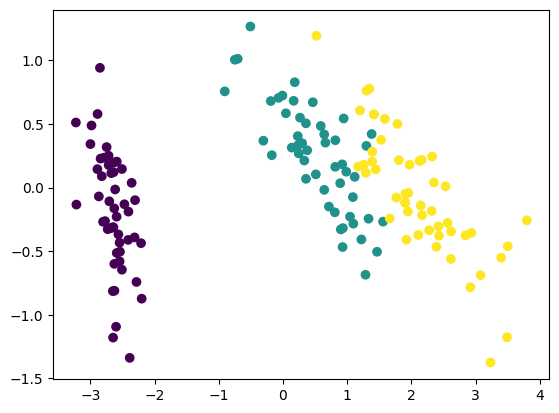

In [27]:
import matplotlib.pyplot as plt

plt.scatter(X_transformed[:,0],X_transformed[:,1], c=iris.target)